In [1]:
#splitting the classes

import glob
import fnmatch

images = glob.glob('D:\Data_Science\Datasets\IDC\**\*.PNG',recursive=True)

pattern0 = '*class0.PNG'
pattern1 = '*class1.PNG'

class0 = fnmatch.filter(images,pattern0)
class1 = fnmatch.filter(images,pattern1)



In [2]:
#resizing the images to make it all of the same size

import cv2

def resizing(lower,upper):
    height = 50
    width = 50
    channels = 3
    x = []
    y = []
    for img in images[lower:upper]:
        full_image = cv2.imread(img)
        image = (cv2.resize(full_image,(width,height),interpolation=cv2.INTER_CUBIC))
        x.append(image)
        if img in class0:
            y.append(0)
        elif img in class1:
            y.append(1)
        else:
            return
    return x,y,image 

In [3]:
#calling the resizing function

x , y , image= resizing(0,100000)
print("done")

done


In [4]:
print(len(y))
print(len(x))
image.shape

100000
100000


(50, 50, 3)

In [5]:
#data preprocessing

import numpy as np

x = np.array(x)
x = x.astype(np.float32)

#normalizing the data
x /= 255.

In [6]:
x.shape

(100000, 50, 50, 3)

In [7]:
#spliting the train and test data

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [8]:
print(xtrain.shape)
print(xtest.shape)

(80000, 50, 50, 3)
(20000, 50, 50, 3)


In [9]:
print(len(ytrain))
print(ytrain.count(0))
print(ytrain.count(1),'\n')

print(len(ytest))
print(ytest.count(0))
print(ytest.count(1))
#here their is a majority and minority. This will lead to a biased model, to solve this....

80000
56683
23317 

20000
14218
5782


In [10]:
##One-Hot-Encode ytrain and ytest

from keras.utils import to_categorical

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

Using TensorFlow backend.


In [11]:
print(ytrain.shape)
print(ytest.shape)

(80000, 2)
(20000, 2)


In [13]:
#reshaping and flattening x to randomize it

X_trainShape = xtrain.shape[1]*xtrain.shape[2]*xtrain.shape[3]
X_testShape = xtest.shape[1]*xtest.shape[2]*xtest.shape[3]
X_trainFlat = xtrain.reshape(xtrain.shape[0], X_trainShape)
X_testFlat = xtest.reshape(xtest.shape[0], X_testShape)

In [15]:
print(X_trainShape)
print(X_testShape)
print(X_trainFlat.shape)
print(X_testFlat.shape)

7500
7500
(80000, 7500)
(20000, 7500)


In [16]:
#solving the majority-minority issue but the data is selected randomly

from imblearn.under_sampling import RandomUnderSampler
random_under_sampler = RandomUnderSampler(ratio='majority')
x_train, y_train = random_under_sampler.fit_sample(X_trainFlat, ytrain)
x_test, y_test = random_under_sampler.fit_sample(X_testFlat, ytest)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(46634, 7500)
(46634, 1)
(11564, 7500)
(11564, 1)


In [18]:
#One-hot-encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [22]:
print(y_train.shape)
print(y_test.shape)

(46634, 2)
(11564, 2)


In [23]:
for i in range(len(x_train)):
    height,width,channels = 50,50,3
    x_train = x_train.reshape(len(x_train),height,width,channels)

In [24]:
x_train.shape

(46634, 50, 50, 3)

In [25]:
for i in range(len(x_test)):
    height,width,channels = 50,50,3
    x_test = x_test.reshape(len(x_test),height,width,channels)

In [26]:
x_test.shape

(11564, 50, 50, 3)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(46634, 50, 50, 3)
(46634, 2)
(11564, 50, 50, 3)
(11564, 2)


In [28]:
#building the neural network

from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 

num_classes = 2

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))


W1107 23:11:30.958270 12900 deprecation_wrapper.py:119] From C:\Users\DanussvaR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1107 23:11:30.991183 12900 deprecation_wrapper.py:119] From C:\Users\DanussvaR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1107 23:11:30.999184 12900 deprecation_wrapper.py:119] From C:\Users\DanussvaR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1107 23:11:31.017112 12900 deprecation_wrapper.py:119] From C:\Users\DanussvaR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1107 23:11:31.055019 12900 deprecation_wrapper.py:119] From C:

In [29]:
#compiling the model

model.compile(loss ='binary_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 

W1107 23:11:49.497719 12900 deprecation_wrapper.py:119] From C:\Users\DanussvaR\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1107 23:11:49.524648 12900 deprecation_wrapper.py:119] From C:\Users\DanussvaR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1107 23:11:49.528639 12900 deprecation.py:323] From C:\Users\DanussvaR\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
#data agumentation

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,vertical_flip = True)

In [31]:
#to avoid overfitting

from keras import callbacks

early_stopping_monitor = callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

In [32]:
#creating a checkpoint

model_checkpoint = callbacks.ModelCheckpoint('best_model_IDC_prediction.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [33]:
batch = 67
epochs = 100
img_width = 50
img_height = 50

In [34]:
#fitting the data

train = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch),steps_per_epoch=len(x_train)/batch,epochs=epochs,
                            validation_data=(x_test,y_test),verbose=1,callbacks=[early_stopping_monitor, model_checkpoint])

Epoch 1/100


C:\Users\DanussvaR\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\DanussvaR\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


697/696 [==============================] - 69s 99ms/step - loss: 0.5477 - acc: 0.7361 - val_loss: 0.4765 - val_acc: 0.7828

Epoch 00001: val_loss improved from inf to 0.47652, saving model to best_model_IDC_prediction.h5
Epoch 2/100
697/696 [==============================] - 66s 94ms/step - loss: 0.4884 - acc: 0.7798 - val_loss: 0.4706 - val_acc: 0.7884

Epoch 00002: val_loss improved from 0.47652 to 0.47061, saving model to best_model_IDC_prediction.h5
Epoch 3/100
697/696 [==============================] - 65s 94ms/step - loss: 0.4646 - acc: 0.7903 - val_loss: 0.4566 - val_acc: 0.7833

Epoch 00003: val_loss improved from 0.47061 to 0.45659, saving model to best_model_IDC_prediction.h5
Epoch 4/100
697/696 [==============================] - 65s 94ms/step - loss: 0.4536 - acc: 0.7959 - val_loss: 0.4386 - val_acc: 0.8069

Epoch 00004: val_loss improved from 0.45659 to 0.43862, saving model to best_model_IDC_prediction.h5
Epoch 5/100
697/696 [==============================] - 66s 95ms/step

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

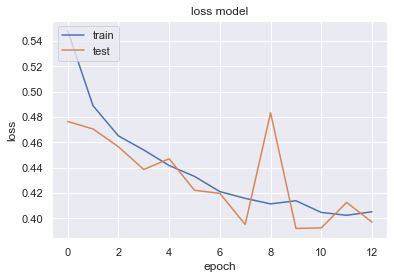

In [36]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import pandas as pd

model = load_model('best_model_IDC_prediction.h5')

y_pred = model.predict(x_test)
y_predict = np.argmax(y_pred, axis = 1)

y_true = np.argmax(y_test,axis=1)

Confusion_Matrix = pd.DataFrame(confusion_matrix(y_true, y_predict),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
print(Confusion_Matrix)

         Predicted Class 0  Predicted Class 1
Class 0               4842                940
Class 1                993               4789


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      5782
           1       0.84      0.83      0.83      5782

    accuracy                           0.83     11564
   macro avg       0.83      0.83      0.83     11564
weighted avg       0.83      0.83      0.83     11564



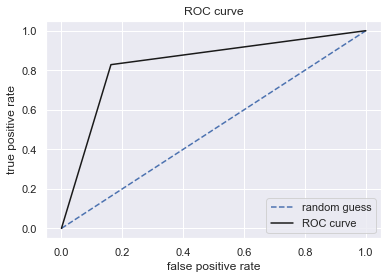

In [43]:
from sklearn.metrics import roc_curve

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_predict)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--',label='random guess')
# plot the roc curve for the model
plt.plot(fpr, tpr, 'k',label='ROC curve')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')

plt.legend()
plt.show()

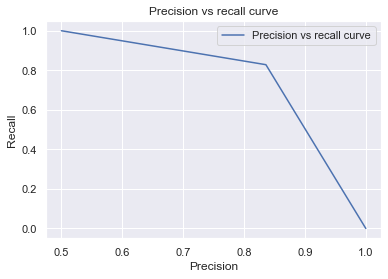

In [44]:
from sklearn.metrics import precision_recall_curve 

#Precision vs Recall Curve
precision, recall, thresholds = precision_recall_curve(y_true, y_predict)
plt.plot(precision, recall, label='Precision vs recall curve')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs recall curve')

plt.legend()
plt.show()